# LIBRARIES

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
from collections import Counter
from wordcloud import WordCloud

warnings.filterwarnings("ignore")
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

try:
    df = pd.read_csv('/kaggle/input/dataset-02/reviews.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/kaggle/input/dataset-02/reviews.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('/kaggle/input/dataset-02/reviews.csv', encoding='ISO-8859-1')

# EXPLORATORY DATA ANALYSIS

In [2]:
df.head()

,review,feedback
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
df.shape

(1000, 2)

In [4]:
print(df['feedback'].value_counts())

feedback
0    500
1    500
Name: count, dtype: int64


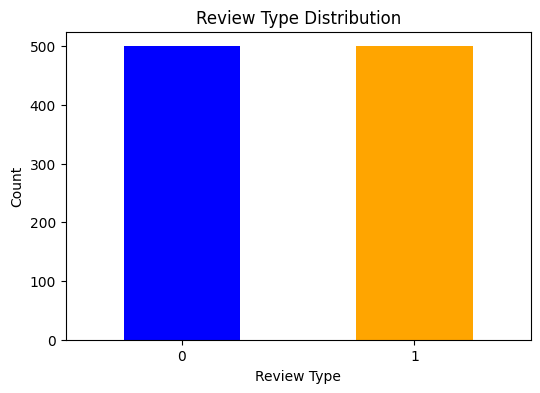

In [5]:
plt.figure(figsize=(6, 4))
df['feedback'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("\nSummary statistics of comment length:")
print(df['review_length'].describe())


Summary statistics of comment length:
count    1000.000000
mean       10.246000
std         6.687616
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        30.000000
Name: review_length, dtype: float64


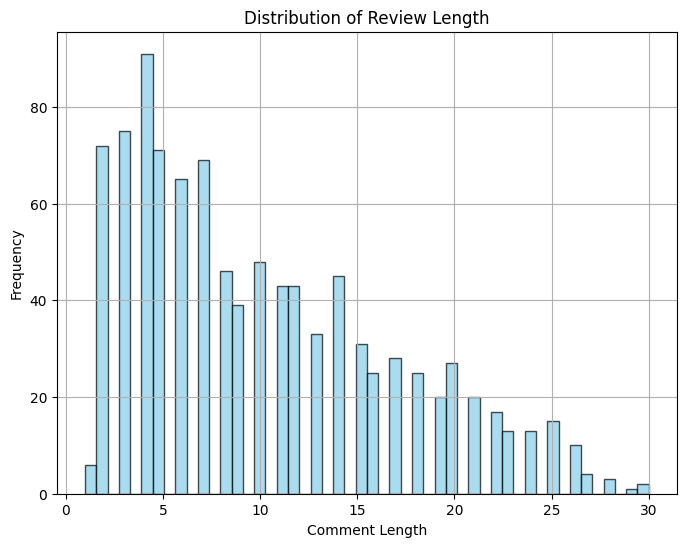

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
all_comments = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

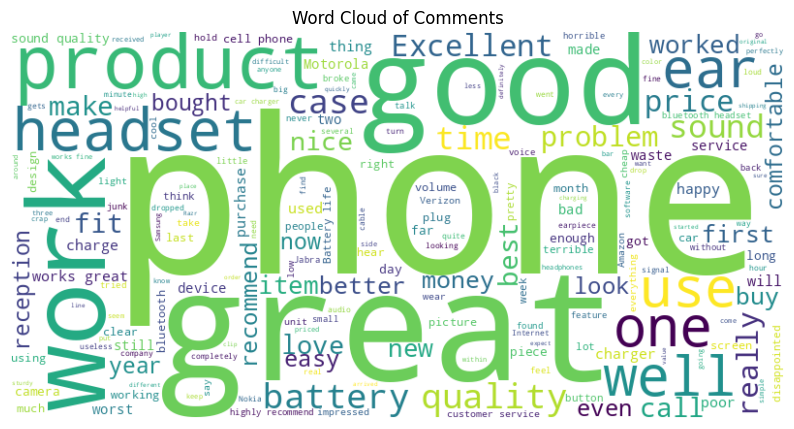

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Comments')
plt.axis('off')
plt.show()

In [10]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

X = df['review']
y = df['feedback']

# LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression

# tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))
lr_tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word',ngram_range=(1, 3)) # 0.7775


X_tfidf = lr_tf_idf.fit_transform(X)
solvers = ['saga', 'lbfgs',  'newton-cg', 'sag', 'liblinear']
lrmodel = LogisticRegression(solver='saga', max_iter=1000)

kf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lrmodel.fit(X_train, y_train)

    y_pred = lrmodel.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.8660714285714286, 0.8198198198198198, 0.7657657657657657, 0.7477477477477478, 0.8198198198198198, 0.7927927927927928, 0.8648648648648649, 0.7837837837837838, 0.8378378378378378]
Mean accuracy: 0.8109448734448734


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        55
           1       0.88      0.79      0.83        56

    accuracy                           0.84       111
   macro avg       0.84      0.84      0.84       111
weighted avg       0.84      0.84      0.84       111

Confusion Matrix:
[[49  6]
 [12 44]]


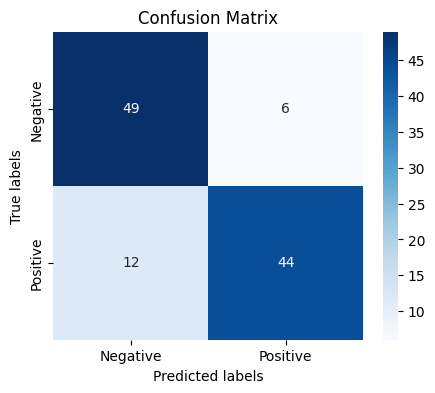

In [13]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-rbf

In [14]:
from sklearn.svm import SVC

svm_tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', ngram_range=(1, 2))

X_tfidf = svm_tf_idf.fit_transform(df['review'])
y = df['feedback']

svcmodel = SVC(kernel='rbf')

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svcmodel.fit(X_train, y_train)
    
    y_pred = svcmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.8214285714285714, 0.7747747747747747, 0.7927927927927928, 0.7477477477477478, 0.8288288288288288, 0.8198198198198198, 0.8468468468468469, 0.8018018018018018, 0.8558558558558559]
Mean accuracy: 0.8099885599885599


In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        55
           1       0.92      0.79      0.85        56

    accuracy                           0.86       111
   macro avg       0.86      0.86      0.86       111
weighted avg       0.86      0.86      0.86       111

Confusion Matrix:
[[51  4]
 [12 44]]


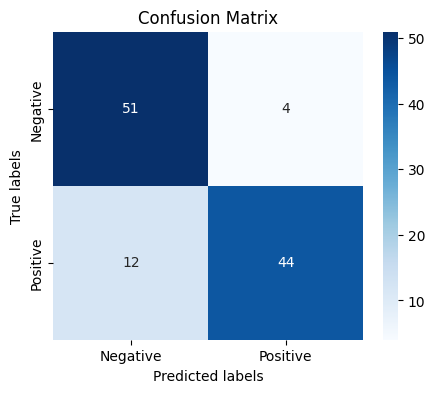

In [16]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-linear

In [18]:
from sklearn.svm import SVC

svm_linear_tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english', ngram_range=(1, 2))

X_tfidf = svm_linear_tf_idf.fit_transform(df['review'])
y = df['feedback']

svc_linear_model = SVC(kernel='linear')

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svc_linear_model.fit(X_train, y_train)
    
    y_pred = svc_linear_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7678571428571429, 0.8108108108108109, 0.7297297297297297, 0.7567567567567568, 0.8558558558558559, 0.8828828828828829, 0.8288288288288288, 0.7747747747747747, 0.8018018018018018]
Mean accuracy: 0.801033176033176


# KNN (n=3)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

X = df['review']
y = df['feedback']

knn_tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english', ngram_range=(1, 2))

X_tfidf = knn_tf_idf.fit_transform(X)
knnmodel = KNeighborsClassifier(n_neighbors=3)

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knnmodel.fit(X_train, y_train)
    
    y_pred = knnmodel.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7589285714285714, 0.7837837837837838, 0.7657657657657657, 0.7207207207207207, 0.8288288288288288, 0.8468468468468469, 0.8018018018018018, 0.7387387387387387, 0.7477477477477478]
Mean accuracy: 0.7770180895180894


# DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier

X = df['review']
y = df['feedback']

dt_tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english')
X_tfidf = dt_tf_idf.fit_transform(X)

dtmodel = DecisionTreeClassifier()

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dtmodel.fit(X_train, y_train)
    
    y_pred = dtmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7857142857142857, 0.7027027027027027, 0.7297297297297297, 0.7837837837837838, 0.7837837837837838, 0.8558558558558559, 0.8468468468468469, 0.7297297297297297, 0.7657657657657657]
Mean accuracy: 0.7759902759902759


# RANDOM FOREST CLASSIFIER

In [21]:
from sklearn.ensemble import RandomForestClassifier

X = df['review']
y = df['feedback']

rf_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))

X_tfidf = rf_tf_idf.fit_transform(X)
rfmodel = RandomForestClassifier()

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfmodel.fit(X_train, y_train)
    
    y_pred = rfmodel.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7857142857142857, 0.7747747747747747, 0.7387387387387387, 0.7927927927927928, 0.8018018018018018, 0.8108108108108109, 0.8648648648648649, 0.7747747747747747, 0.8108108108108109]
Mean accuracy: 0.795009295009295


# BERNOULLI-NB

In [22]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['review']
y = df['feedback']

bnb_tf_idf = TfidfVectorizer(analyzer='word', sublinear_tf=True)  # Adjust parameters as needed
X_tfidf = bnb_tf_idf.fit_transform(X)

bnbmodel = BernoulliNB()

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    bnbmodel.fit(X_train, y_train)

    y_pred = bnbmodel.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7857142857142857, 0.8648648648648649, 0.7567567567567568, 0.7837837837837838, 0.8108108108108109, 0.8288288288288288, 0.8558558558558559, 0.8558558558558559, 0.8198198198198198]
Mean accuracy: 0.818032318032318


# GUASSIAN-NB

In [23]:
from sklearn.naive_bayes import GaussianNB

X = df['review']
y = df['feedback']

gnb_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3))  # Adjust parameters as needed

X_tfidf = gnb_tf_idf.fit_transform(X)

gnbmodel = GaussianNB()

skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gnbmodel.fit(X_train.toarray(), y_train)  # GaussianNB requires dense arrays
    
    y_pred = gnbmodel.predict(X_test.toarray())  # GaussianNB requires dense arrays
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7678571428571429, 0.8018018018018018, 0.7117117117117117, 0.7207207207207207, 0.7747747747747747, 0.8108108108108109, 0.7297297297297297, 0.7567567567567568, 0.7837837837837838]
Mean accuracy: 0.7619941369941371


In [34]:
query_comment = input("Enter your comment to predict its class: ")

print("Choose the algorithm for prediction: ")
print("1. K Nearest Neighbours")
print("2. SVC Linear")
print("3. SVC Rbf")
print("4. Gaussain Naive Bayes")
print("5. Linear Regression")
print("6. Random Forest")
print("7. Bernoulli Naive Bayes")
print("8. Decision Tree")

prediction = -1
option = int(input())

if option == 1:
    token = knn_tf_idf.transform([query_comment])
    prediction = knnmodel.predict(token)
elif option == 2:
    token = svm_linear_tf_idf.transform([query_comment])
    prediction = svc_linear_model.predict(token)
elif option == 3:
    token = svm_tf_idf.transform([query_comment])
    prediction = svcmodel.predict(token)
elif option == 4:
    token = gnb_tf_idf.transform([query_comment])
    prediction = gnbmodel.predict(token.toarray())
elif option == 5:
    token = lr_tf_idf.transform([query_comment])
    prediction = lrmodel.predict(token)
elif option == 6:
    token = rf_tf_idf.transform([query_comment])
    prediction = rfmodel.predict(token)
elif option == 7:
    token = bnb_tf_idf.transform([query_comment])
    prediction = bnbmodel.predict(token)
elif option == 8:
    token = dt_tf_idf.transform([query_comment])
    prediction = dtmodel.predict(token)
else:
    print("Enter correct option!")
    
if prediction == 1:
    print("Positive")
else:
    print("Negative")

Enter your comment to predict its class:  best action and romantic movie


Choose the algorithm for prediction: 
1. K Nearest Neighbours
2. SVC Linear
3. SVC Rbf
4. Gaussain Naive Bayes
5. Linear Regression
6. Random Forest
7. Bernoulli Naive Bayes
8. Decision Tree


 8


Positive
